# Accuracy of model vs reference paleomap

The accuracy of predictions is evaluated by comparing predicted with observed paleomaps. To rate the model, several similarity and accuracy metrics are proposed.

In [57]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 

%matplotlib inline
%config InlineBackend.figure_format = 'svg' 



## Accuracy scores

+ RMSE:	root mean square error measuring the overall quality of the prediction
+ MAE: mean absolute prediction error measuring the average prediction bias
+ R2: coefficient of determination measuring the strength of the linear relationship between the predicted and observed values
+ LCC:	Lin’s concordance correlation coefficient measuring the degree of predicted and observed values follow the 45° line
+ Non Matching: percentage of non matching pixel with a specify elevation difference range

In [2]:
df_a = pd.read_pickle('accuracy')
display(df_a)

,LCC,MAE,R2,RMSE,nonmatching,region
0,0.987173,180.047223,0.975347,359.800653,0.435386,global
1,0.857435,191.964632,0.738121,343.853161,0.517205,lands
2,0.507228,150.579016,-0.791915,376.397805,0.362694,shelf
3,0.945664,179.279098,0.887268,365.236855,0.403249,ocean
0,0.996378,83.932563,0.992823,194.136752,0.217407,global
1,0.981328,60.802049,0.962470,130.169849,0.161982,lands
2,0.802455,98.482112,0.523546,194.088096,0.276073,shelf
3,0.979088,94.261286,0.958033,222.846841,0.237225,ocean
0,0.997695,60.945200,0.995399,155.434926,0.155093,global
1,0.990789,38.623912,0.981380,91.687630,0.093065,lands


In [72]:
def acc_score(key='RMSE'):
    
    glob = df_a[df_a.region == 'global']
    rmse = glob[key].to_numpy()

    land = df_a[df_a.region == 'lands']
    rmse = np.stack((rmse, land[key].to_numpy()))

    shelf = df_a[df_a.region == 'shelf']
    rmse = np.vstack((rmse, shelf[key].to_numpy()))

    ocean = df_a[df_a.region == 'ocean']
    rmse = np.vstack((rmse, ocean[key].to_numpy()))
    
    df = pd.DataFrame(rmse.T,columns=('global','lands','shelf','ocean'))
    
    return df

In [85]:
rmse = acc_score(key='RMSE')
mae = acc_score(key='MAE')
r2 = acc_score(key='R2')
lcc = acc_score(key='LCC')
nomatch = acc_score(key='nonmatching')

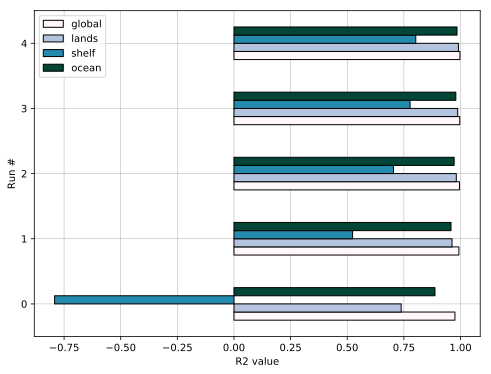

In [159]:
ax = r2.plot.barh(figsize=(8,6),colormap='PuBuGn',edgecolor='k')
ax.set_xlabel('R2 value')
ax.set_ylabel('Run #')
# ax.legend(loc='upper left' ) 
ax.set_axisbelow(True)
# ax.set_facecolor("lightgray")
ax.grid(linestyle='-', linewidth='0.5')

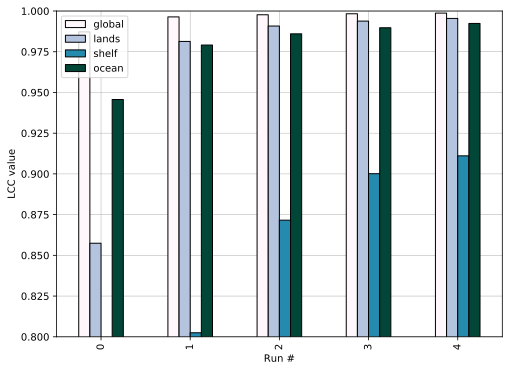

In [158]:
ax = lcc.plot.bar(figsize=(8,6),colormap='PuBuGn',edgecolor='k')
ax.set_ylim(0.8,1.)
ax.set_ylabel('LCC value')
ax.set_xlabel('Run #')
# ax.legend(loc='upper left' ) 
ax.set_axisbelow(True)
# ax.set_facecolor("lightgray")
ax.grid(linestyle='-', linewidth='0.5')

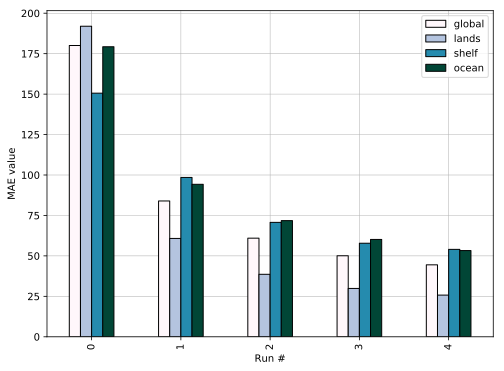

In [154]:
ax = mae.plot.bar(figsize=(8,6),colormap='PuBuGn',edgecolor='k')
ax.set_ylabel('MAE value')
ax.set_xlabel('Run #')
ax.set_axisbelow(True)
# ax.set_facecolor("lightgray")
ax.grid(linestyle='-', linewidth='0.5')

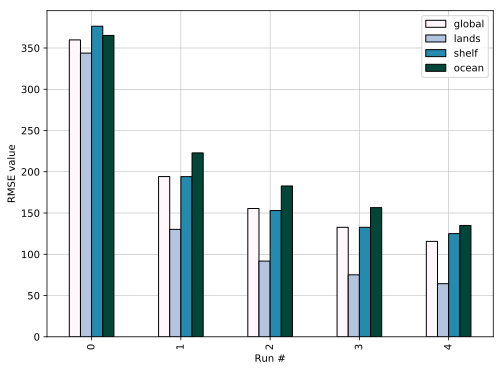

In [155]:
ax = rmse.plot.bar(figsize=(8,6),colormap='PuBuGn',edgecolor='k')
ax.set_ylabel('RMSE value')
ax.set_xlabel('Run #')
ax.set_axisbelow(True)
# ax.set_facecolor("lightgray")
ax.grid(linestyle='-', linewidth='0.5')

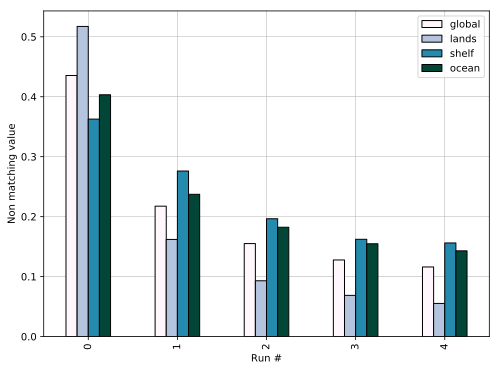

In [156]:
ax = nomatch.plot.bar(figsize=(8,6),colormap='PuBuGn',edgecolor='k')
ax.set_ylabel('Non matching value')
ax.set_xlabel('Run #')
ax.set_axisbelow(True)
# ax.set_facecolor("lightgray")
ax.grid(linestyle='-', linewidth='0.5')


## Similarity

+ L1: norm Manhattan distance
+ Covariance: https://en.wikipedia.org/wiki/Covariance
+ CoorCoef: https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient
+ Cosine similarity: https://en.wikipedia.org/wiki/Cosine_similarity
+ Dot product: https://en.wikipedia.org/wiki/Dot_product
+ Pearson's correlation coefficient: https://en.wikipedia.org/wiki/Pearson_correlation_coefficient



In [4]:
df_s = pd.read_pickle('similarity')
display(df_s)

,L1,corrcoef,cosine,covariance,dotproduct,pearson,region
0,3.234017e+05,0.998085,0.999067,0.997920,0.999418,0.988040,global
1,2.108810e+06,0.965749,0.968939,0.971384,0.976261,0.904739,lands
2,4.799376e+05,0.952440,0.954541,0.688743,0.748241,0.568242,shelf
3,7.763358e+05,0.998085,0.999067,0.997920,0.999418,0.947921,ocean
0,1.917815e+05,0.999690,0.999886,0.999678,0.999942,0.996422,global
1,9.260400e+05,0.994908,0.995811,0.998400,0.998363,0.983029,lands
2,3.476989e+05,0.976663,0.981074,0.964583,0.973676,0.814718,shelf
3,7.285208e+05,0.999690,0.999886,0.999678,0.999942,0.979216,ocean
0,6.024485e+05,0.999854,0.999947,0.999855,0.999972,0.997698,global
1,6.794608e+05,0.998277,0.998759,0.999070,0.999282,0.991067,lands


In [121]:
def sim_score(key='pearson'):
    
    glob = df_s[df_s.region == 'global']
    sim = glob[key].to_numpy()

    land = df_s[df_s.region == 'lands']
    sim = np.stack((sim, land[key].to_numpy()))

    shelf = df_s[df_s.region == 'shelf']
    sim = np.vstack((sim, shelf[key].to_numpy()))

    ocean = df_s[df_s.region == 'ocean']
    sim = np.vstack((sim, ocean[key].to_numpy()))
    
    df = pd.DataFrame(sim.T,columns=('global','lands','shelf','ocean'))
    
    return df

In [126]:
pearson = sim_score(key='pearson')
corrcoef = sim_score(key='corrcoef')
cosine = sim_score(key='cosine')
l1 = sim_score(key='L1')
covariance = sim_score(key='covariance')
dotproduct = sim_score(key='dotproduct')

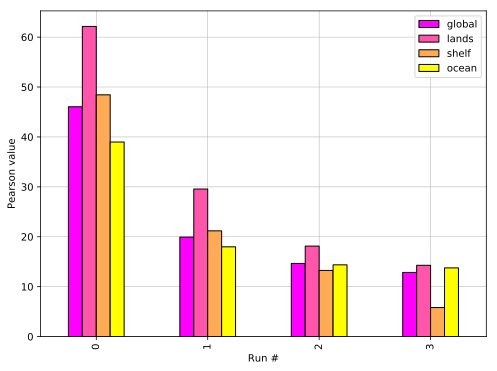

In [160]:
ax = imp.plot.bar(figsize=(8,6),colormap='spring',edgecolor='k')
ax.set_ylabel('Pearson value')
ax.set_xlabel('Run #')
ax.set_axisbelow(True)
# ax.set_facecolor("lightgray")
ax.grid(linestyle='-', linewidth='0.5')

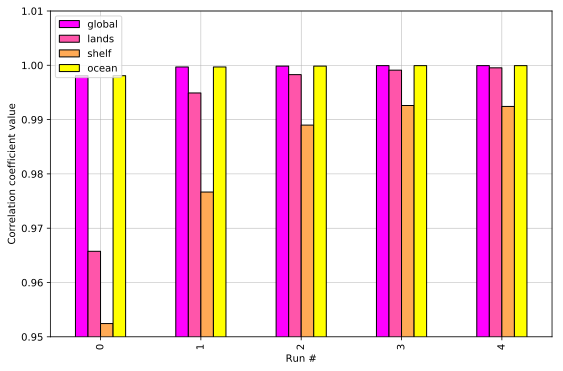

In [163]:
ax = corrcoef.plot.bar(figsize=(9,6),colormap='spring',edgecolor='k')
ax.set_ylabel('Correlation coefficient value')
ax.set_xlabel('Run #')
ax.set_ylim(0.95,1.01)
ax.set_axisbelow(True)
# ax.set_facecolor("lightgray")
ax.grid(linestyle='-', linewidth='0.5')

## Improvement

Comparisons between successive models

In [5]:
df_i = pd.read_pickle('improvement')
display(df_i)

,region,relative improvement
0,global,46.043246
1,lands,62.143768
2,shelf,48.435380
3,ocean,38.985664
0,global,19.935342
1,lands,29.563082
2,shelf,21.185249
3,ocean,17.983030
0,global,14.661283
1,lands,18.130717


In [118]:
def imp_score(key='relative improvement'):
    
    glob = df_i[df_i.region == 'global']
    imsc = glob[key].to_numpy()

    land = df_i[df_i.region == 'lands']
    imsc = np.stack((imsc, land[key].to_numpy()))

    shelf = df_i[df_i.region == 'shelf']
    imsc = np.vstack((imsc, shelf[key].to_numpy()))

    ocean = df_i[df_i.region == 'ocean']
    imsc = np.vstack((imsc, ocean[key].to_numpy()))
    
    df = pd.DataFrame(imsc.T,columns=('global','lands','shelf','ocean'))
    
    return df

In [119]:
imp = imp_score()

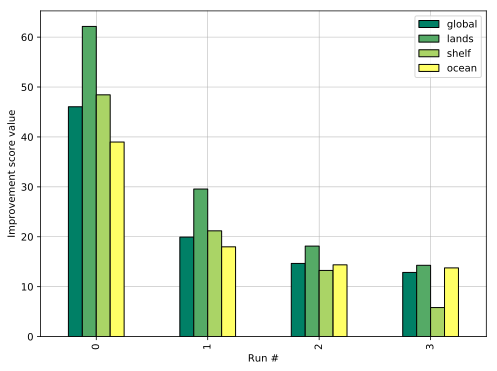

In [144]:
ax = imp.plot.bar(figsize=(8,6),colormap='summer',edgecolor='k')
ax.set_ylabel('Improvement score value')
ax.set_xlabel('Run #')
ax.set_axisbelow(True)
# ax.set_facecolor("lightgray")
ax.grid(linestyle='-', linewidth='0.5')